# Image representation

Stefan/Yuzhao Heng

Since Mon. Sep. 20th, 2021


## Idea

ECG signal is temporal, while 12 leads are recorded at the same time.

Lead segments recorded around the same time might be helpful. How can the machine learn from this?


## Setup



In [1]:
import numpy as np

import os

from icecream import ic

from util import *
from ecg_data import EcgData
from ecg_label import EcgLabel

os.chdir('../../PVC_DATA')

# np.random.seed(7)
dnm = 'daeVt'
dg = EcgData()



### Normalize signals



In [2]:
ecgs = dg(f'{dnm}.ecg')
ecgs_norm = normalize_signal(ecgs)

energies = np.sum(np.square(ecgs_norm), axis=-1)  # Sanity check
np.testing.assert_almost_equal(energies, np.full(energies.shape, energies[0]))



## Show a few



daeVt 8, wall: FW; side: EP; vent: NA


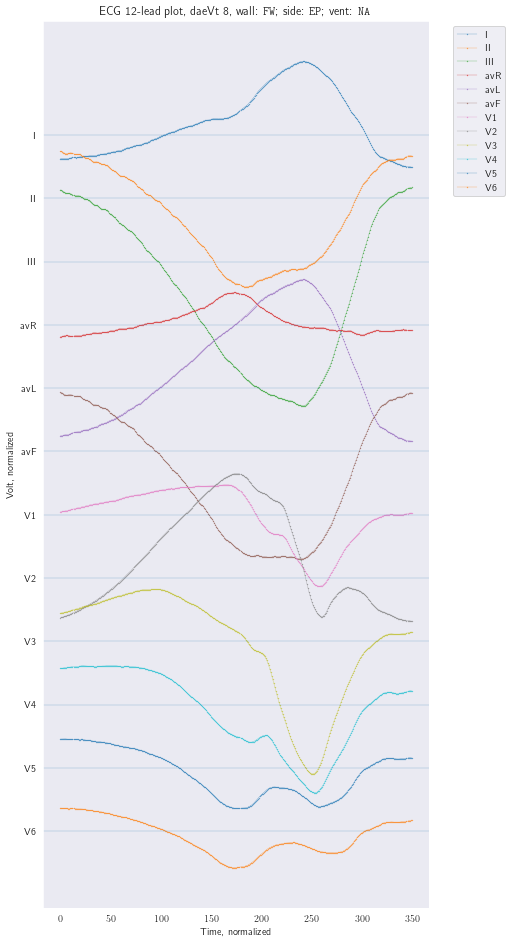

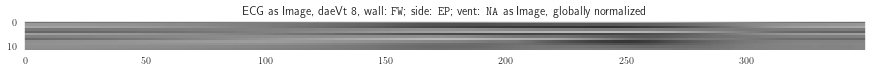

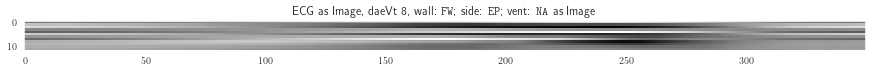

daeVt 9, wall: FW; side: IM; vent: NA


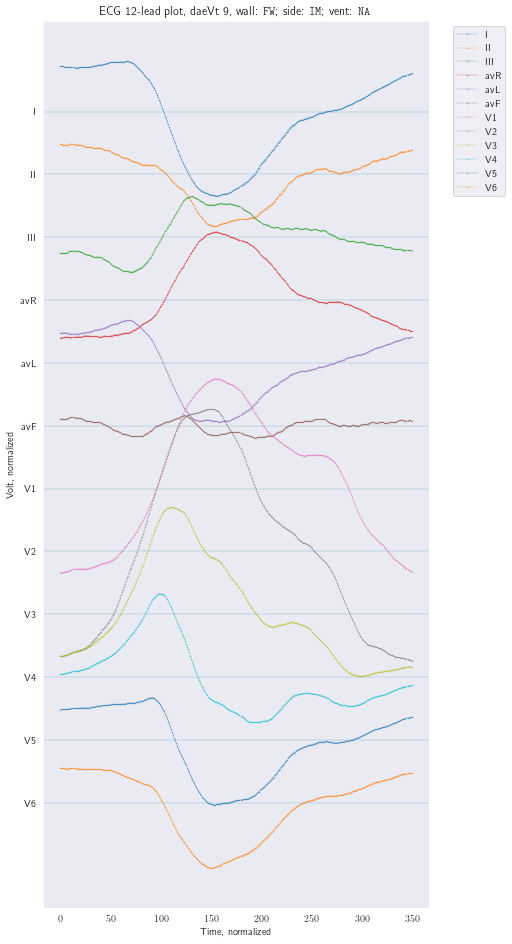

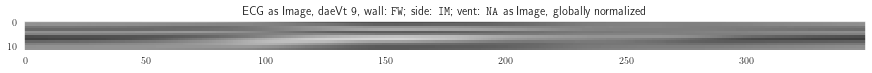

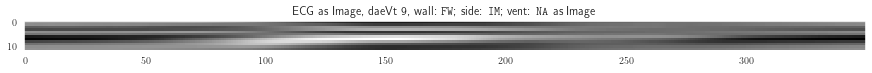

daeVt 124, wall: FW; side: ED; vent: LV


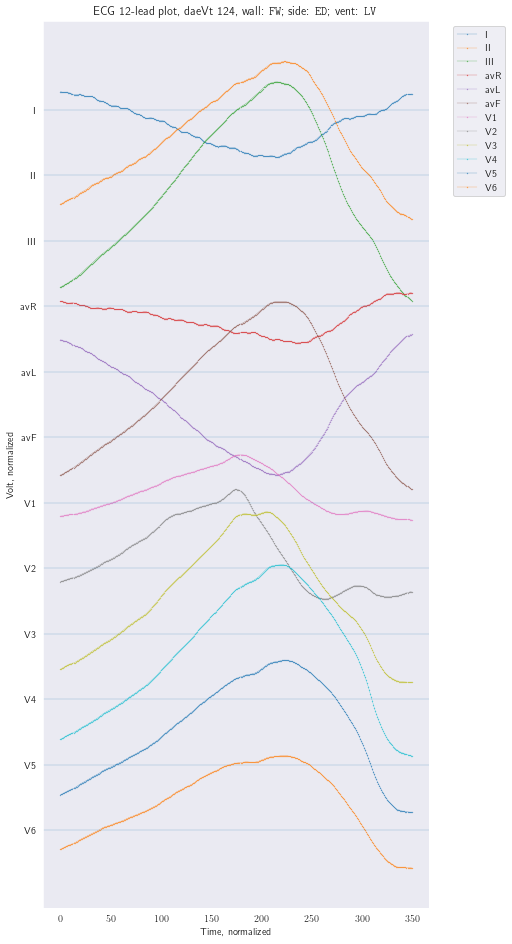

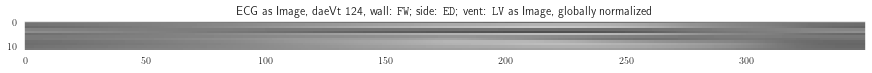

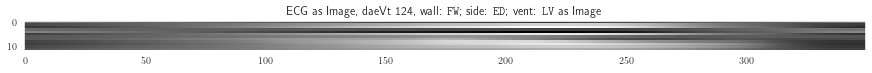

daeVt 5, wall: SP; side: EP; vent: NA


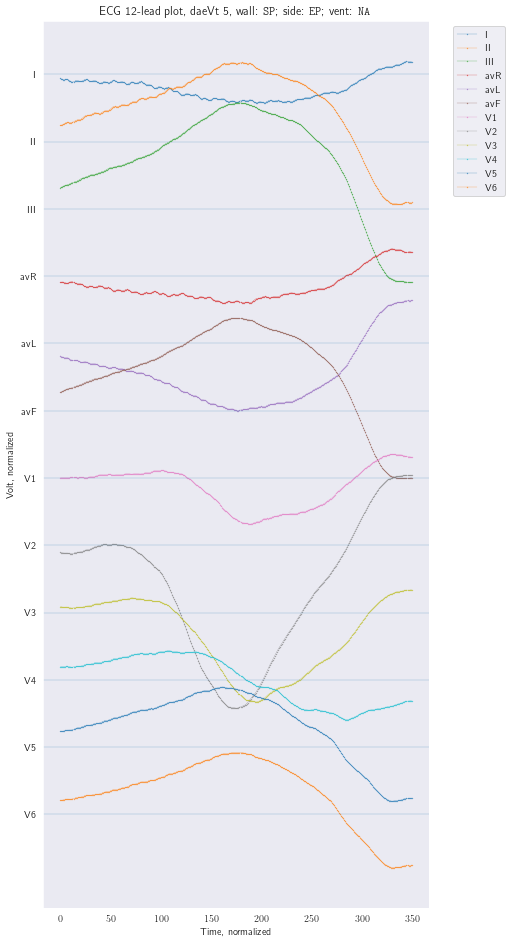

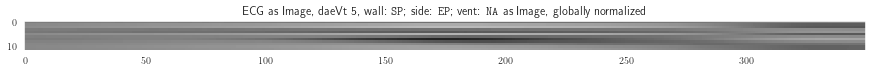

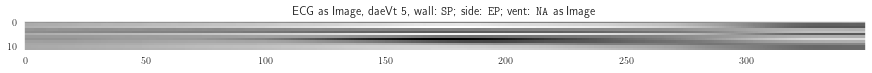

daeVt 2, wall: SP; side: IM; vent: NA


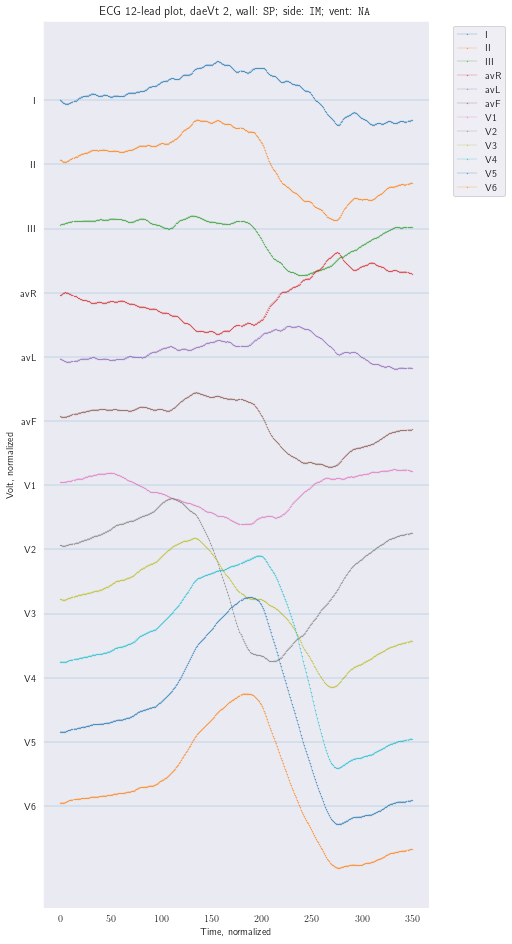

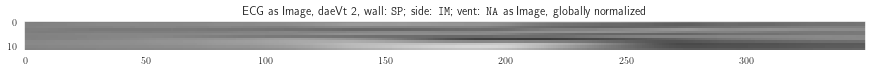

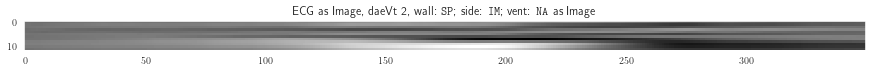

daeVt 79, wall: SP; side: ED; vent: LV


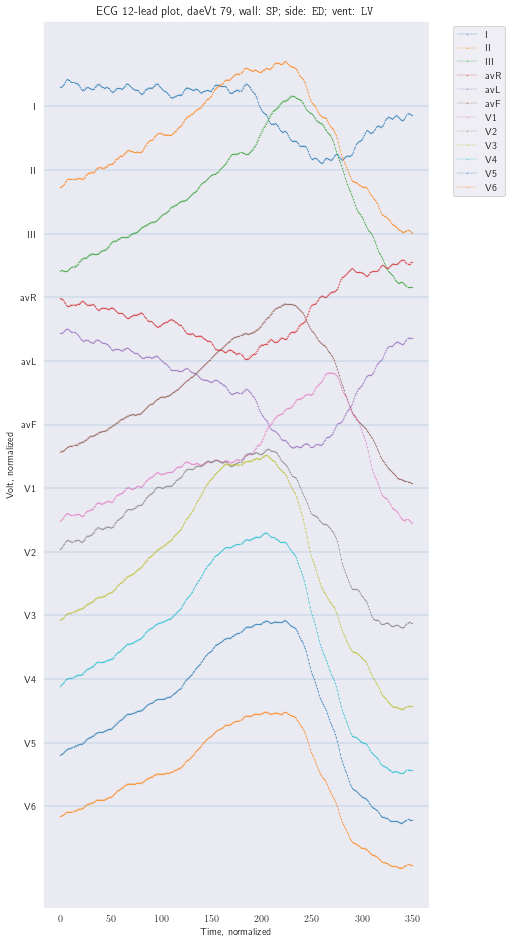

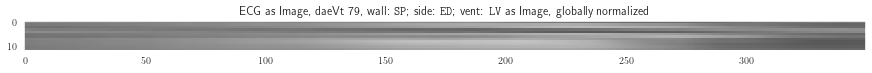

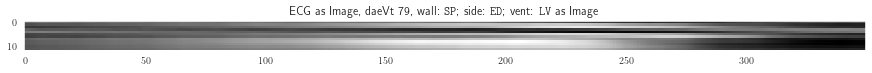

daeVt 0, wall: SP; side: ED; vent: RV


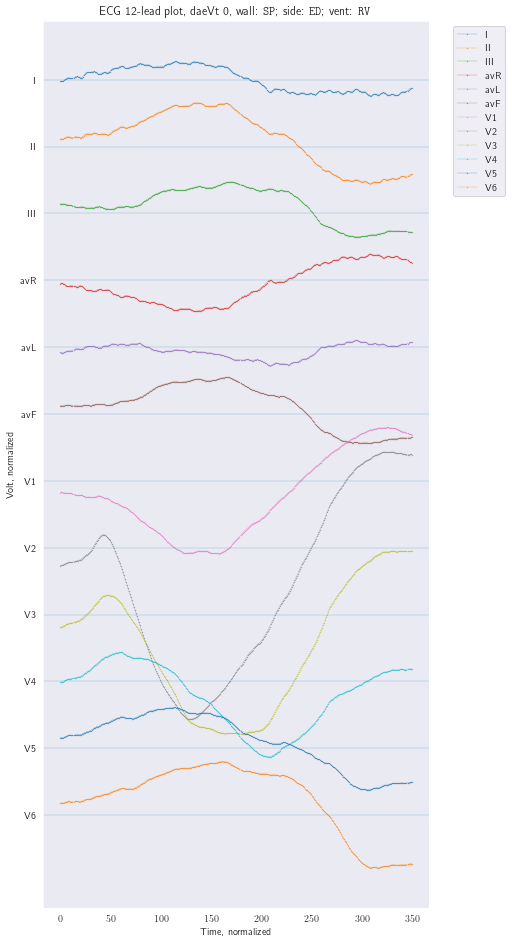

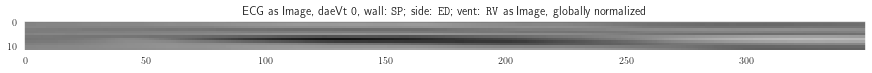

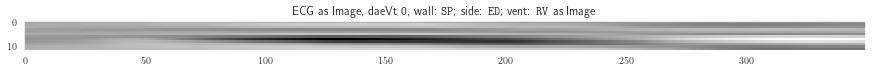

In [3]:
labels = EcgLabel(dnm)
low = np.min(ecgs_norm)
hi = np.max(ecgs_norm)


for idx, row in labels.unique().iterrows():
    def _title(t):
        return f'{dnm} {idx}, {t}'

    sig = ecgs_norm[idx]
    print(_title(srs2str(row, keys=labels.label_types, tex=False)))

    title = _title(srs2str(row, keys=labels.label_types))
    plot_ecg(sig, title=title)
    plot_ecg_img(sig, low=low, hi=hi, title=f'{title} as Image, globally normalized')
    plot_ecg_img(sig, title=f'{title} as Image')

